In [40]:
import graph_construction as function
import numpy as np
import venn

In [41]:
#setting dataset and method parameter
tcga=True
msk=False
nsclc=False
shuffle=False
k_fold_method=False
k_fold=4
k=3
path_k_fold = "_k_fold" if k_fold_method else ""

In [42]:
#create folder results
import os
if tcga:
    name_study="tcga_filtred"
    path_data="../Data/tcga_filtred"
    if not os.path.exists("../Output/LUNG/Lung_tcga"):
        os.makedirs("../Output/LUNG/Lung_tcga")
    path_results="../Output/LUNG/Lung_tcga"
elif msk:
    name_study="msk_filtred"
    path_data="../Data/msk_filtred"
    if not os.path.exists("../Output/LUNG/msk_filtred"):
        os.makedirs("../Output/LUNG/msk_filtred")
    path_results="../Output/LUNG/msk_filtred"
elif nsclc:
    name_study="nsclc_filtred"
    path_data="../Data/nsclc_filtred/"
    if not os.path.exists("../Output/LUNG/nsclc_filtred"):
        os.makedirs("../Output/LUNG/nsclc_filtred")
    path_results="../Output/LUNG/nsclc_filtred"
elif k_fold_method:
    name_study="LUNG"
    path_data="../Data/LUNG"
    if not os.path.exists("../Output/LUNG/CROSS_VALIDATION"):
        os.makedirs("../Output/LUNG/CROSS_VALIDATION")
    path_results="../Output/LUNG/CROSS_VALIDATION"

elif shuffle:
    name_study="LUNG"
    path_data="../Data/LUNG"
    if not os.path.exists("../Output/LUNG/SHUFFLE"):
        os.makedirs("../Output/LUNG/SHUFFLE")
    path_results="../Output/LUNG/SHUFFLE"
    seeds = 999
    np.random.seed(seeds)
else:
    name_study="LUNG"
    path_data="../Data/LUNG"
    path_results="../Output/LUNG/Lung_Gene_Particular"
    if not os.path.exists(path_results):
        os.makedirs(path_results)

In [43]:
#setting  mutational variable
gene="EGFR"
del_19=False
PAZ_OTHER_CENTER=False
exon=""
vaf=0.05
variant_type=""
hgvsp_short=""
path_save=""


In [44]:
#import data_mutational,data_sample,data_patient
if not tcga and not msk:
    print("CIAO")
    path_mutational=f"{path_data}/data_mutations_extended.txt"
elif nsclc:
    path_mutational=f"{path_data}/data_mutational.txt"
else:
    path_mutational=f"{path_data}/data_mutational_extended.txt"
path_clinical_sample=f"{path_data}/data_clinical_sample.txt"
path_clinical_patient=f"{path_data}/data_clinical_patient.txt"

data_mut,data_sample,data_patient=function.read_file(path_mutational,path_clinical_sample,path_clinical_patient)

In [45]:
#selezione dei sample di interesse sulla base delle variabili mutazionali
sample_select=[]
if del_19:
    sample_select=data_mut[(data_mut["Hugo_Symbol"]=="EGFR")&(data_mut["Exon_Number"]=="19/28")&(data_mut["Variant_Type"]=="DEL")& (data_mut["t_AF"]>=vaf)]["Tumor_Sample_Barcode"]
    if shuffle:
        if not os.path.exists(f"{path_results}/EGFR_DEL_19_shuffle_{seeds}"):
            os.makedirs(f"{path_results}/EGFR_DEL_19_shuffle_{seeds}")
        path_save=f"{path_results}/EGFR_DEL_19_shuffle_{seeds}"

    elif k_fold_method:
        if not os.path.exists(f"{path_results}/EGFR_DEL_19_{k}"):
            os.makedirs(f"{path_results}/EGFR_DEL_19_{k}")
        path_save=f"{path_results}/EGFR_DEL_19_{k}"

    else:
        if not os.path.exists(f"{path_results}/EGFR_DEL_19"):
            os.makedirs(f"{path_results}/EGFR_DEL_19")
        path_save=f"{path_results}/EGFR_DEL_19"

elif exon!="" and variant_type=="":
    sample_select=data_mut[(data_mut["Hugo_Symbol"]==gene)&(data_mut["Exon_Number"]==exon) & (data_mut["t_AF"]>=vaf)]["Tumor_Sample_Barcode"]
    if shuffle:
        if not os.path.exists(f"{path_results}/{gene}_{exon}_shuffle_{seeds}"):
            os.makedirs(f"{path_results}/{gene}_{exon}_shuffle_{seeds}")
        path_save=f"{path_results}/{gene}_{exon}_shuffle_{seeds}"
    
    elif k_fold_method:
        if not os.path.exists(f"{path_results}/{gene}_{exon}_{k}"):
            os.makedirs(f"{path_results}/{gene}_{exon}_{k}")
        path_save=f"{path_results}/{gene}_{exon}_{k}"

    else:
        if not os.path.exists(f"{path_results}/{gene}_{exon}"):
            os.makedirs(f"{path_results}/{gene}_{exon}")
        path_save=f"{path_results}/{gene}_{exon}"


elif hgvsp_short=="" and exon=="":
    print("ciao")
    sample_select=data_mut[(data_mut["Hugo_Symbol"]==gene)& (data_mut["t_AF"]>=vaf)]["Tumor_Sample_Barcode"]
    if shuffle:
        if not os.path.exists(f"{path_results}/{gene}_all_shuffle_{seeds}"):
            os.makedirs(f"{path_results}/{gene}_all_shuffle_{seeds}")
        path_save=f"{path_results}/{gene}_all_shuffle_{seeds}"
    elif k_fold_method:
        if not os.path.exists(f"{path_results}/{gene}_all_{k}"):
            os.makedirs(f"{path_results}/{gene}_all_{k}")
        path_save=f"{path_results}/{gene}_all_{k}"

    else:
        if not os.path.exists(f"{path_results}/{gene}_all"):
            os.makedirs(f"{path_results}/{gene}_all")
        path_save=f"{path_results}/{gene}_all"

elif variant_type != "":
    sample_select=data_mut[(data_mut["Hugo_Symbol"]==gene)&(data_mut["Exon_Number"]==exon)&(data_mut["Variant_Type"]==variant_type)& (data_mut["t_AF"]>=vaf)]["Tumor_Sample_Barcode"]
    if shuffle:
        if not os.path.exists(f"{path_results}/{gene}_{exon}_{variant_type}_shuffle_{seeds}"):
            os.makedirs(f"{path_results}/{gene}_{exon}_{variant_type}_shuffle_{seeds}")
        print(exon)
        path_save=f"{path_results}/{gene}_{exon}_{variant_type}_shuffle_{seeds}"
    elif k_fold_method:
        if not os.path.exists(f"{path_results}/{gene}_{exon}_{variant_type}_{k}"):
            os.makedirs(f"{path_results}/{gene}_{exon}_{variant_type}_{k}")
        print(exon)
        path_save=f"{path_results}/{gene}_{exon}_{variant_type}_{k}"

    else:
        if not os.path.exists(f"{path_results}/{gene}_{exon}_{variant_type}"):
            os.makedirs(f"{path_results}/{gene}_{exon}_{variant_type}")
        print(exon)
        path_save=f"{path_results}/{gene}_{exon}_{variant_type}"

else:
    sample_select=data_mut[(data_mut["Hugo_Symbol"]==gene)&(data_mut["HGVSp_Short"]==hgvsp_short)&(data_mut["t_AF"]>=vaf)]["Tumor_Sample_Barcode"]
    if shuffle:
        if not os.path.exists(f"{path_results}/{gene}_{hgvsp_short}_shuffle_{seeds}"):
            os.makedirs(f"{path_results}/{gene}_{hgvsp_short}_shuffle_{seeds}")
        path_save=f"{path_results}/{gene}_{hgvsp_short}_shuffle_{seeds}"
    
    elif k_fold_method:
        if not os.path.exists(f"{path_results}/{gene}_{hgvsp_short}_{k}"):
            os.makedirs(f"{path_results}/{gene}_{hgvsp_short}_{k}")
        path_save=f"{path_results}/{gene}_{hgvsp_short}_{k}"


    else:
        if not os.path.exists(f"{path_results}/{gene}_{hgvsp_short}"):
            os.makedirs(f"{path_results}/{gene}_{hgvsp_short}")
        path_save=f"{path_results}/{gene}_{hgvsp_short}"



data_mut=data_mut[data_mut["Tumor_Sample_Barcode"].isin(sample_select)]

#shuffle
if shuffle:
    data_mut["Tumor_Sample_Barcode"]=data_mut["Tumor_Sample_Barcode"].sample(frac=1).values


ciao


In [46]:
#aggiunta della colonna categorica per le mutazioni al data mutational
data_mutational=function.adding_category_mutation(data_mut)

In [47]:
#selezione dei parametri oncogenic
print("Oncogenic column before",data_mutational["ONCOGENIC"].unique())

if not tcga and not msk and not nsclc:
  data_mutational=data_mutational[data_mutational["ONCOGENIC"].isin(["Likely Oncogenic","Oncogenic","Olaparib"]) ]

print("Oncogenic column after",data_mutational["ONCOGENIC"].unique())

Oncogenic column before ['Unknown' 'Likely Oncogenic' 'Oncogenic' 'Inconclusive' 'Likely Neutral']
Oncogenic column after ['Unknown' 'Likely Oncogenic' 'Oncogenic' 'Inconclusive' 'Likely Neutral']


In [48]:
data_mutational.to_csv(f"{path_save}/data_mutational.txt",sep="\t",index=False)

In [49]:
if k_fold_method:
    all_samples=data_mutational["Tumor_Sample_Barcode"].unique()
    all_samples_filtred=[]
    block_division=len(all_samples)//k_fold
    for i,e in enumerate(all_samples):
        if i >=(k*block_division) and i <(k*block_division)+block_division:
            continue
        all_samples_filtred.append(e)
    data_mutational=data_mutational[data_mutational["Tumor_Sample_Barcode"].isin(all_samples_filtred)]
    

In [50]:
print("Numero di sample presenti nel dato mutazionale:",len(data_mutational["Tumor_Sample_Barcode"].unique()))

Numero di sample presenti nel dato mutazionale: 69


In [51]:
#creating map_patients and map_variants + map_consequence
map_patients,map_variants,map_tp53,map_consequence=function.create_maps(data_mutational)

print("Numero sample su cui è costruito il grafo:",len(map_patients.keys()))
print("Numero varianti su cui è costruito il grafo:",len(map_variants.keys()))

Numero sample su cui è costruito il grafo: 69
Numero varianti su cui è costruito il grafo: 13791


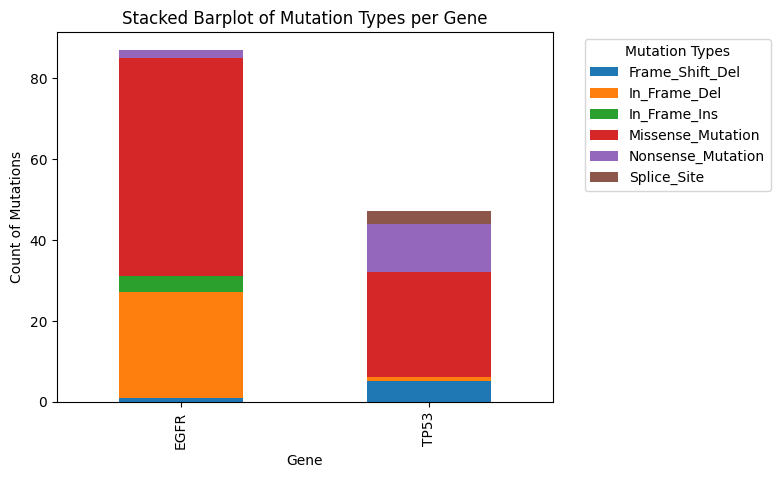

In [52]:
function.plot_mutation_gene(map_consequence,["EGFR","TP53"])

In [53]:
import sys
from multiprocessing import Pool
import random

#creazione del grafo e del dendrogramma
graph=function.graph_creation(map_patients,map_variants)

#selezione del seed
best_seed=0
if sys.platform.startswith('win') or sys.platform.startswith("linux"):
    def process_data(_seed):
        random.seed(_seed)
        _dendro=graph.community_leiden(objective_function="modularity")
        modularity=_dendro.modularity
        return modularity

    data = list(range(10_000))
    with Pool() as p:
        mod_results = p.map(process_data, data)

    best_seed = mod_results.index(max(mod_results))

else:
    def process_data(_seed):
        random.seed(_seed)
        _dendro=graph.community_leiden(objective_function="modularity")
        modularity=_dendro.modularity
        return modularity

    data = list(range(1000))
    mod_results = []
    for s in data:
        mod_results.append(process_data(s))
    best_seed = mod_results.index(max(mod_results))


best_seed = mod_results.index(max(mod_results))
random.seed(best_seed)
_dendro=graph.community_leiden(objective_function="modularity")
with open(f"{path_save}/modularity.csv","w") as f:
    f.write("num_cluster\tModularity\n")
    f.write(str(len(list(_dendro)))+"\t"+str(_dendro.modularity))
print("numero di clusters:", len(list(_dendro)),"Modularità:",_dendro.modularity)

numero di clusters: 48 Modularità: 0.9351287932577188


In [54]:
#creazione dendrogramma
dendro=function.leiden_clustering(graph,best_seed)

numero di clusters: 48 Modularità: 0.9351287932577188


In [55]:
#aggiunta dei colori al grafo
graph=function.adding_graph_color(graph,dendro)
#plot del grafo
function.plot_graph(graph,path_save,gene)

#save file for cytoscape
function.write_graph_to_cytoscape(graph,path_save)

In [56]:
#creating map_cluster
map_cluster=function.map_cluster_creation(graph,dendro)

In [57]:
#adding cluster number to maps
map_patients,map_variants=function.adding_cluster_to_map(map_cluster,map_variants,map_patients)

In [58]:
#creation file for variants centroid
function.centroids_cluster(dendro,path_save)

#creation pairs centroid-element for each cluster + save file
all_pairs=function.couple_centroid_element(dendro,map_cluster,path_save)

In [59]:
#adding clinical sample info
map_patients=function.enriched_sample_data(data_sample,map_cluster,map_patients)

#adding clinical patient info
map_patients=function.enriched_patient_data(data_patient,map_patients)

In [60]:
#creation od data_clinical_sample enriched with cluster number
data_cluster_sample=function.creation_cluster_clinical_data(map_patients,path_save)

In [61]:
#cluster with more or one patient
cluster_more_patient,cluster_one_patient=function.cluster_division(map_cluster)

In [62]:
#file for summary file
function.numerosity_info(path_save,map_cluster)

In [63]:
function.summary_info(path_save,map_cluster,map_patients)

In [64]:
#count for each gene of mutation presents
gene_total_count=function.count_gene(graph)

#creation of value absolute and % for each gene for each cluster
map_gene_count,map_gene_percent=function.count_gene_abs_percent(map_cluster,gene_total_count,path_save)

#save list of gene present for each cluster(no unique)
function.genes_single_cluster(map_cluster,path_save)

In [65]:
map_patients

{'TCGA-05-4382-01': {'variants': {'Mut_ZAN_p.P756Q',
   'Mut_CLINT1_p.E254*',
   'Mut_PBRM1_p.N739S',
   'Mut_VPS13C_p.G129V',
   'Mut_DDR2_p.W72L',
   'Mut_ADCY9_p.S51F',
   'Mut_GPR85_p.P300T',
   'Mut_ZNF792_p.D41Y',
   'Mut_RBPMS2_p.X69_splice',
   'Mut_BTN2A2_p.K152*',
   'Mut_TRPV2_p.V448L',
   'Mut_EPB41L2_p.V617L',
   'Mut_PHRF1_p.I819M',
   'Mut_KCNMA1_p.K426N',
   'Mut_ITGAL_p.Q655K',
   'Mut_SRRM2_p.S815I',
   'Mut_TMCO5A_p.E65K',
   'Mut_MXRA5_p.W1642L',
   'Mut_OTUD7A_p.G405C',
   'Mut_PAH_p.D143Y',
   'Mut_LPPR4_p.T596N',
   'Mut_MYH1_p.L666F',
   'Mut_TNS1_p.K282Rfs*80',
   'Mut_ITGA11_p.L338F',
   'Mut_ANKMY2_p.G69*',
   'Mut_PSMC2_p.E207K',
   'Mut_IL3_p.A79S',
   'Mut_ARHGAP26_p.V170L',
   'Mut_DDI1_p.R163L',
   'Mut_SMARCAD1_p.D224H',
   'Mut_SLC17A1_p.R140L',
   'Mut_ALDH16A1_p.G218C',
   'Mut_DNAH2_p.R3604P',
   'Mut_IFNA13_p.Q64K',
   'Mut_SLC39A12_p.S149C',
   'Mut_UTRN_p.X414_splice',
   'Mut_RGS18_p.T106I',
   'Mut_FAM46B_p.E248K',
   'Mut_CDH9_p.Q237K',
   'Mu

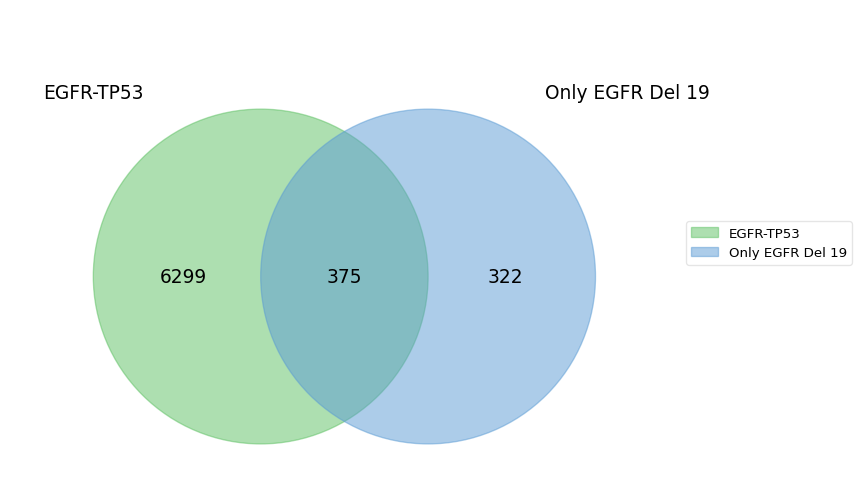

In [66]:
EGFR=True
gene_tp53=set()
gene_egfr_l858r_no_tp53=set()
gene_egfr_del_19_no_tp53=set()

pazient_tp53_egfr=[]
pazient_egfr_l858r_no_tp53=[]
pazienti_egfr_del_19_no_tp53=[]

variant_tp53=set()
variant_egfr_l858r_no_tp53=set()
variant_egfr_del_19_no_tp53=set()


if EGFR:
    for patient, infos in map_patients.items():
        if "Mut_TP53" in infos["variants"]:
            #print(infos["Patient_status"])
            pazient_tp53_egfr.append(patient)
            for info in infos["variants"]:
                variant_tp53.add(info)
                gene=info.split("_")[1]
                gene_tp53.add(gene)
        elif "Mut_EGFR_p.L858R" in infos["variants"] and "Mut_TP53" not in infos["variants"]:
            pazient_egfr_l858r_no_tp53.append(patient)
            for info in infos["variants"]:
                variant_egfr_l858r_no_tp53.add(info)
                gene=info.split("_")[1]
                gene_egfr_l858r_no_tp53.add(gene)
        elif "Mut_EGFR_del_19" in infos["variants"] and "Mut_TP53" not in infos["variants"]:
            pazienti_egfr_del_19_no_tp53.append(patient)
            for info in infos["variants"]:
                variant_egfr_del_19_no_tp53.add(info)
                gene=info.split("_")[1]
                gene_egfr_del_19_no_tp53.add(gene)
    
    #mappa egfr-tp3 vs egfr_l858r
    map_tp53_l858r={}
    map_tp53_l858r["TP53"]=[]
    map_tp53_l858r["EGFR_L858R"]=[]
    for gene in gene_tp53:
        map_tp53_l858r["TP53"].append(gene)

    for gene in gene_egfr_l858r_no_tp53:
        map_tp53_l858r["EGFR_L858R"].append(gene)

    #labels_1 = venn.get_labels([map_tp53_l858r[k] for k in map_tp53_l858r.keys()])
    #fig_1, ax_1 = venn.venn2(labels_1, names=["EGFR-TP53","Only EGFR p.L858R"])
    #fig_1.savefig(f"{path_save}/venn_clusters_l858r.pdf")

    #mappa egfr-tp3 vs egfr_del_19
    map_tp53_del_19={}
    map_tp53_del_19["TP53"]=[]
    map_tp53_del_19["EGFR_DEL_19"]=[]
    for gene in gene_tp53:
        map_tp53_del_19["TP53"].append(gene)

    for gene in gene_egfr_del_19_no_tp53:
        map_tp53_del_19["EGFR_DEL_19"].append(gene)
    
    labels_2= venn.get_labels([map_tp53_del_19[k] for k in map_tp53_del_19.keys()])
    fig_2, ax_2 = venn.venn2(labels_2, names=["EGFR-TP53","Only EGFR Del 19"])
    fig_2.savefig(f"{path_save}/venn_clusters_del_19.pdf")
    

with open(f"{path_save}/genes_egfr_tp53.txt","w") as f:
    for gene in gene_tp53:
        f.write(gene+"\n")
with open(f"{path_save}/pazient_egfr_tp53.txt","w") as f:
    if tcga:
        f.write("Sampe\tPatient\n")
        for paz in pazient_tp53_egfr:
            f.write(paz+"\t"+str(map_patients[paz]["PATIENT_ID"])+"\n")
    else:
        f.write("Sample\tPatient\tYear\n")
        for paz in pazient_tp53_egfr:
            f.write(paz+"\t"+str(map_patients[paz]["PATIENT_ID"])+"\t"+str(map_patients[paz]["YEAR"])+"\n")


with open(f"{path_save}/genes_egfr_l858r.txt","w") as f:
    for gene in gene_egfr_l858r_no_tp53:
        f.write(gene+"\n")
with open(f"{path_save}/pazient_egfr_del_19_no_tp53txt","w") as f:
    if tcga:
        f.write("Sampe\tPatient\n")
        for paz in pazienti_egfr_del_19_no_tp53:
            f.write(paz+"\t"+str(map_patients[paz]["PATIENT_ID"])+"\n")
    else:
        f.write("Sample\tPatient\tYear\n")
        for paz in pazienti_egfr_del_19_no_tp53:
            f.write(paz+"\t"+str(map_patients[paz]["PATIENT_ID"])+"\t"+str(map_patients[paz]["YEAR"])+"\n")



with open(f"{path_save}/genes_egfr_del_19.txt","w") as f:
    for gene in gene_egfr_del_19_no_tp53:
        f.write(gene+"\n")
with open(f"{path_save}/pazient_egfr_l858r_no_tp53txt","w") as f:
    if tcga:
        f.write("Sampe\tPatient\n")
        for paz in pazient_egfr_l858r_no_tp53:
            f.write(paz+"\t"+str(map_patients[paz]["PATIENT_ID"])+"\n")
    else:
        f.write("Sample\tPatient\tYear\n")
        for paz in pazient_egfr_l858r_no_tp53:
            f.write(paz+"\t"+str(map_patients[paz]["PATIENT_ID"])+"\t"+str(map_patients[paz]["YEAR"])+"\n")
    